In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib 

#Model
import statsmodels.formula.api as smf 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [2]:
from tpot import TPOTRegressor

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,KFold

import warnings
warnings.filterwarnings("ignore")  #--to ignore warnings
Energy = pd.read_csv('Regrerssion_energy_production_data.csv',delimiter=';')
Energy

C:\Users\AMRUTA PATOLE\anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


In [3]:
#Dropping first row as it contains duplicate header names
Energy.drop([0],axis=0,inplace = True)
Energy.head()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
5,23.63,60.93,1006.41,83.06,439.90


In [4]:
#Checking For NA Values
Energy.isnull().sum()

temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64

In [5]:
#Checking the shape of the Dataset
Energy.shape

(9567, 5)

In [6]:
Energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9567 entries, 1 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9567 non-null   float64
 1   exhaust_vacuum     9567 non-null   float64
 2   amb_pressure       9567 non-null   float64
 3   r_humidity         9567 non-null   float64
 4   energy_production  9567 non-null   float64
dtypes: float64(5)
memory usage: 373.8 KB


In [7]:
# DType Conversion
Energy['temperature'] = pd.to_numeric(Energy['temperature'], errors='coerce')
Energy['exhaust_vacuum'] = pd.to_numeric(Energy['exhaust_vacuum'], errors='coerce')
Energy['amb_pressure'] = pd.to_numeric(Energy['amb_pressure'], errors='coerce')
Energy['r_humidity'] = pd.to_numeric(Energy['r_humidity'], errors='coerce')
Energy['energy_production'] = pd.to_numeric(Energy['energy_production'],errors='coerce')

# Visualizations

Text(0.5, 1.0, 'R Humidity')

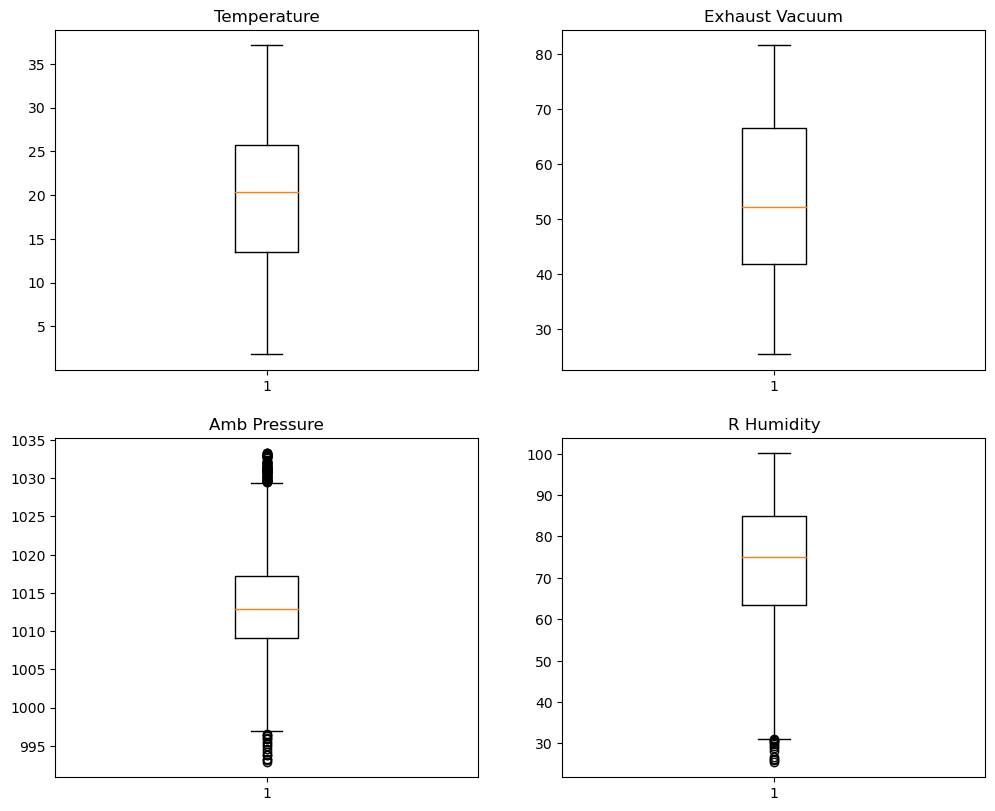

In [8]:
#Checking for outliers using boxplots
plt.figure(figsize=(12,15))
plt.subplot(321)
plt.boxplot(Energy['temperature'])
plt.title("Temperature")

plt.subplot(322)
plt.boxplot(Energy['exhaust_vacuum'])
plt.title("Exhaust Vacuum")

plt.subplot(323)
plt.boxplot(Energy['amb_pressure'])
plt.title("Amb Pressure")

plt.subplot(324)
plt.boxplot(Energy['r_humidity'])
plt.title("R Humidity")

In [9]:
#Descriptive Stats
Energy.describe()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
count,9567.000000,9567.000000,9567.000000,9567.000000,9567.000000
mean,19.652283,54.307450,1013.258686,73.310359,454.362194
std,7.452153,12.707537,5.938970,14.600407,17.065665
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.335000,439.750000
50%,20.350000,52.080000,1012.940000,74.980000,451.520000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [10]:
# Calculating IQR 
IQR_amb = 1017.26 - 1009.10
IQR_r = 84.83 - 63.335
#printing
print("IQR for amb_pressure is: ",IQR_amb)
print("IQR for r_humidity is: ",IQR_r)

IQR for amb_pressure is:  8.159999999999968
IQR for r_humidity is:  21.494999999999997


In [11]:
#Calculating Lower & Upper Extreme for amb_pressure
LE_amb = 1009.10 - IQR_amb * 1.5
UE_amb = 1017.26 + IQR_amb * 1.5
#printing
print("Lower Extreme of amb_pressure is: ",LE_amb)
print("Upper Extreme of amb_pressure is: ",UE_amb)

Lower Extreme of amb_pressure is:  996.8600000000001
Upper Extreme of amb_pressure is:  1029.5


In [12]:
#Calculating Lower & Upper Extreme for r_humidity
LE_r = 63.335 - IQR_r * 1.5
UE_r = 81.56 + IQR_r * 1.5
#printing
print("Lower Extreme of r_humidity is: ",LE_r)
print("Upper Extreme of r_humidity is: ",UE_r)

Lower Extreme of r_humidity is:  31.09250000000001
Upper Extreme of r_humidity is:  113.8025


In [13]:
#Original shape Before Outlier removal
Energy.shape

(9567, 5)

In [14]:
# Checking Total Outliers for Lower Extreme of amb_pressure
len(Energy[Energy.amb_pressure<LE_amb])

15

In [15]:
#Removing Outliers of amb_pressure 
Energy1 = Energy[~(Energy.amb_pressure<LE_amb)]
Energy1.shape

(9552, 5)

In [16]:
# Checking Total Outliers for Upper Extreme of amb_pressure
len(Energy1[Energy1.amb_pressure>UE_amb])

73

In [17]:
#Removing Outliers of amb_pressure 
Energy2 = Energy1[~(Energy1.amb_pressure>UE_amb)]
Energy2.shape

(9479, 5)

In [18]:
# Checking Total Outliers for Lower Extreme of r_humidity
len(Energy2[Energy2.r_humidity<LE_r])

12

In [19]:
#Removing Outliers of r_humidity
Energy3 = Energy2[~(Energy2.r_humidity<LE_r)]
Energy3.shape

(9467, 5)

Text(0.5, 1.0, 'R Humidity')

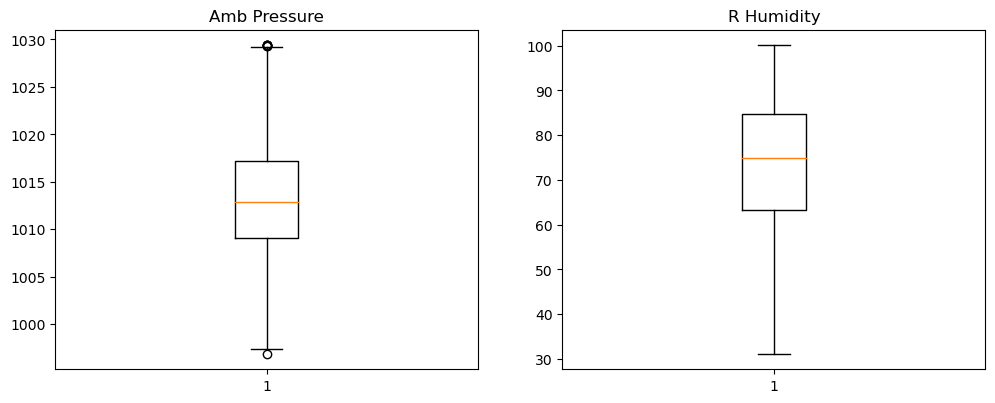

In [20]:
#BoxPlot After Outliers Removal 
plt.figure(figsize=(12,15))

plt.subplot(321)
plt.boxplot(Energy3['amb_pressure'])
plt.title("Amb Pressure")

plt.subplot(322)
plt.boxplot(Energy3['r_humidity'])
plt.title("R Humidity")

In [21]:
#Descriptive Stats 
Energy3.describe()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
count,9467.000000,9467.000000,9467.000000,9467.000000,9467.000000
mean,19.720953,54.415365,1013.148394,73.323479,454.206436
std,7.426974,12.701035,5.704787,14.551337,17.027908
min,1.810000,25.360000,996.870000,31.150000,420.260000
25%,13.580000,41.740000,1009.090000,63.300000,439.695000
50%,20.500000,52.720000,1012.900000,74.980000,451.210000
75%,25.760000,66.540000,1017.170000,84.840000,468.185000
max,37.110000,81.560000,1029.410000,100.160000,495.760000


In [22]:
# Calculating IQR 
IQR = 1017.17 - 1009.09
#printing
print("IQR for amb_pressure is: ",IQR)

#Calculating Lower & Upper Extreme for amb_pressure
LE = 1009.09 - IQR * 1.5
UE = 1017.17 + IQR * 1.5
#printing
print("Lower Extreme of amb_pressure is: ",LE)
print("Upper Extreme of amb_pressure is: ",UE)

IQR for amb_pressure is:  8.079999999999927
Lower Extreme of amb_pressure is:  996.9700000000001
Upper Extreme of amb_pressure is:  1029.29


In [23]:
# Checking Total Outliers for Lower Extreme of amb_pressure
len(Energy3[Energy3.amb_pressure<LE])

1

In [24]:
#Removing Outliers of amb_pressure 
Energy4 = Energy3[~(Energy3.amb_pressure<LE)]
Energy4.shape

(9466, 5)

In [25]:
# Checking Total Outliers for Upper Extreme of amb_pressure
len(Energy4[Energy4.amb_pressure>UE])

6

In [26]:
#Removing Outliers of amb_pressure 
Energy5 = Energy4[~(Energy4.amb_pressure>UE)]
Energy5.shape

(9460, 5)

Text(0.5, 1.0, 'Amb Pressure')

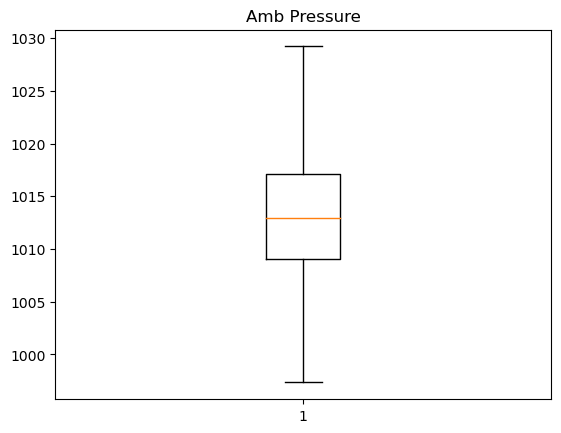

In [27]:
#BoxPlot After Outliers Removal 
plt.boxplot(Energy5['amb_pressure'])
plt.title("Amb Pressure")

Text(0.5, 1.0, 'R Humidity')

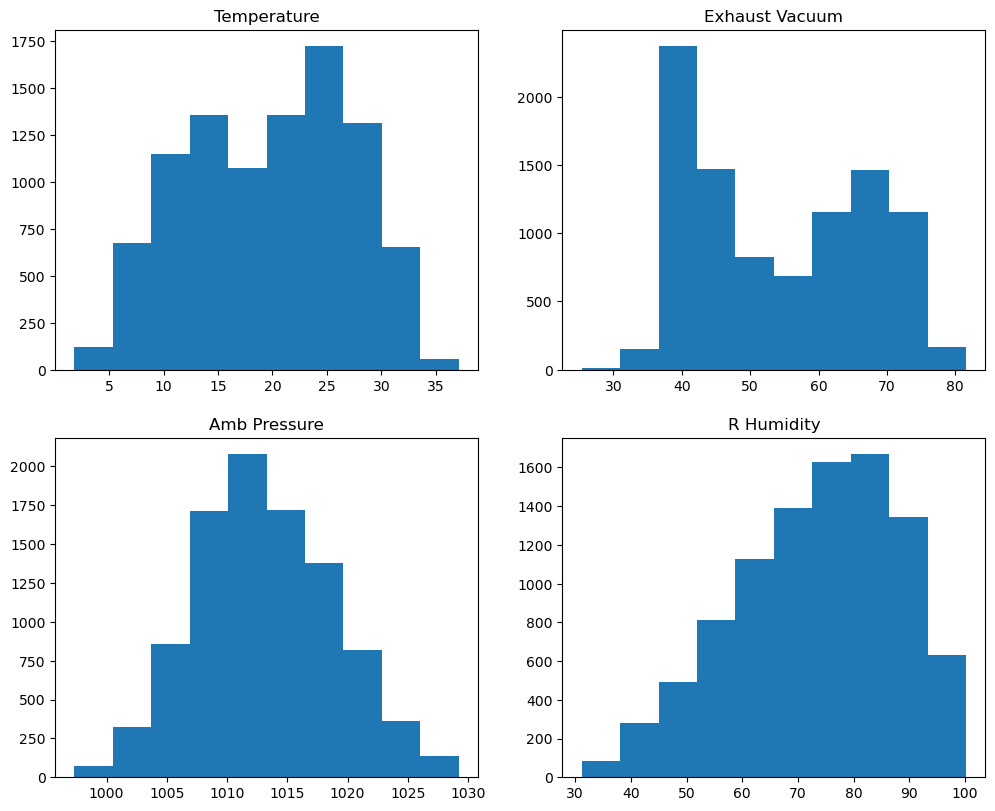

In [28]:
#Histogram 
plt.figure(figsize=(12,15))
plt.subplot(321)
plt.hist(Energy5['temperature'])
plt.title("Temperature")

plt.subplot(322)
plt.hist(Energy5['exhaust_vacuum'])
plt.title("Exhaust Vacuum")

plt.subplot(323)
plt.hist(Energy5['amb_pressure'])
plt.title("Amb Pressure")

plt.subplot(324)
plt.hist(Energy5['r_humidity'])
plt.title("R Humidity")

In [29]:
#Final dataset after EDA
Energy5.head()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
5,23.63,60.93,1006.41,83.06,439.90


# Detecting Colinearity

In [30]:
#corr()
Energy5.corr()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
temperature,1.000000,0.842700,-0.508590,-0.542383,-0.947482
exhaust_vacuum,0.842700,1.000000,-0.415344,-0.310376,-0.868671
amb_pressure,-0.508590,-0.415344,1.000000,0.105283,0.521162
r_humidity,-0.542383,-0.310376,0.105283,1.000000,0.388245
energy_production,-0.947482,-0.868671,0.521162,0.388245,1.000000


In [31]:
#Checking VIF
rsq_Tem = smf.ols('temperature~exhaust_vacuum+amb_pressure+r_humidity',data=Energy5).fit().rsquared  
vif_Tem = 1/(1-rsq_Tem) 

rsq_ex = smf.ols('exhaust_vacuum~temperature+amb_pressure+r_humidity',data=Energy5).fit().rsquared  
vif_ex = 1/(1-rsq_ex) 

rsq_amb = smf.ols('amb_pressure~temperature+exhaust_vacuum+r_humidity',data=Energy5).fit().rsquared  
vif_amb = 1/(1-rsq_amb) 

rsq_rh = smf.ols('r_humidity~temperature+exhaust_vacuum+amb_pressure',data=Energy5).fit().rsquared  
vif_rh = 1/(1-rsq_rh) 

# Storing vif values in a data frame
d1 = {'Variables':['temperature','exhaust_vacuum','amb_pressure','r_humidity'],'VIF':[vif_Tem,vif_ex,vif_amb,vif_rh]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,temperature,5.907042
1,exhaust_vacuum,3.906507
2,amb_pressure,1.447229
3,r_humidity,1.697335
